In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# warranings
import warnings
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score

In [66]:
data=pd.read_csv(r"C:\Users\Acer\Downloads\Fraud Detection Dataset.csv")
data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [68]:
data.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [69]:
data.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [70]:
data["Transaction_Amount"]=data["Transaction_Amount"].fillna(data["Transaction_Amount"].median())

In [71]:
data["Time_of_Transaction"]=data["Time_of_Transaction"].fillna(data["Time_of_Transaction"].median())
data["Device_Used"]=data["Device_Used"].fillna(data["Device_Used"].mode()[0])
data["Location"]=data["Location"].fillna(data["Location"].mode()[0])
data["Payment_Method"]=data["Payment_Method"].fillna(data["Payment_Method"].mode()[0])

In [72]:
q1=data["Transaction_Amount"].quantile(0.25)
q3=data["Transaction_Amount"].quantile(0.75)

In [73]:
IQR=q3-q1

In [74]:
max_range=q3+1.5*IQR
min_range=q1-1.5*IQR

In [75]:
new_data=data[(data["Transaction_Amount"]>=min_range) & (data["Transaction_Amount"]<=max_range)] 

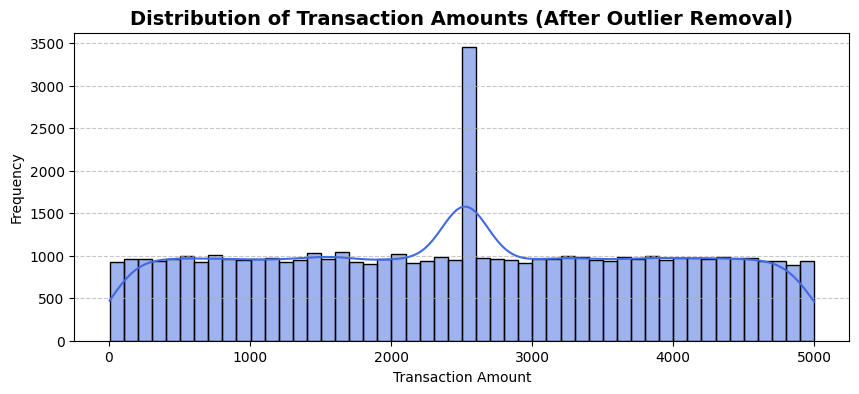

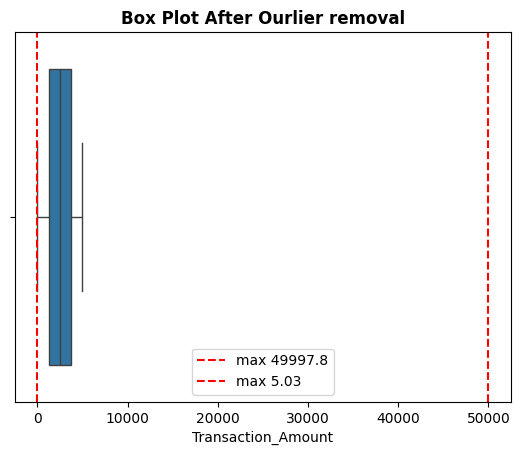

In [76]:
plt.figure(figsize=(10, 4))
sns.histplot(new_data["Transaction_Amount"], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Transaction Amounts (After Outlier Removal)", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

original_max=data["Transaction_Amount"].max()
original_min=data["Transaction_Amount"].min()

sns.boxplot(data=new_data,x=new_data["Transaction_Amount"])
plt.axvline(x=original_max,color="red", linestyle="--", label=f"max {original_max}")
plt.axvline(x=original_min,color="red", linestyle="--", label=f"max {original_min}")
plt.title("Box Plot After Ourlier removal", fontweight="bold")
plt.legend()
plt.show()

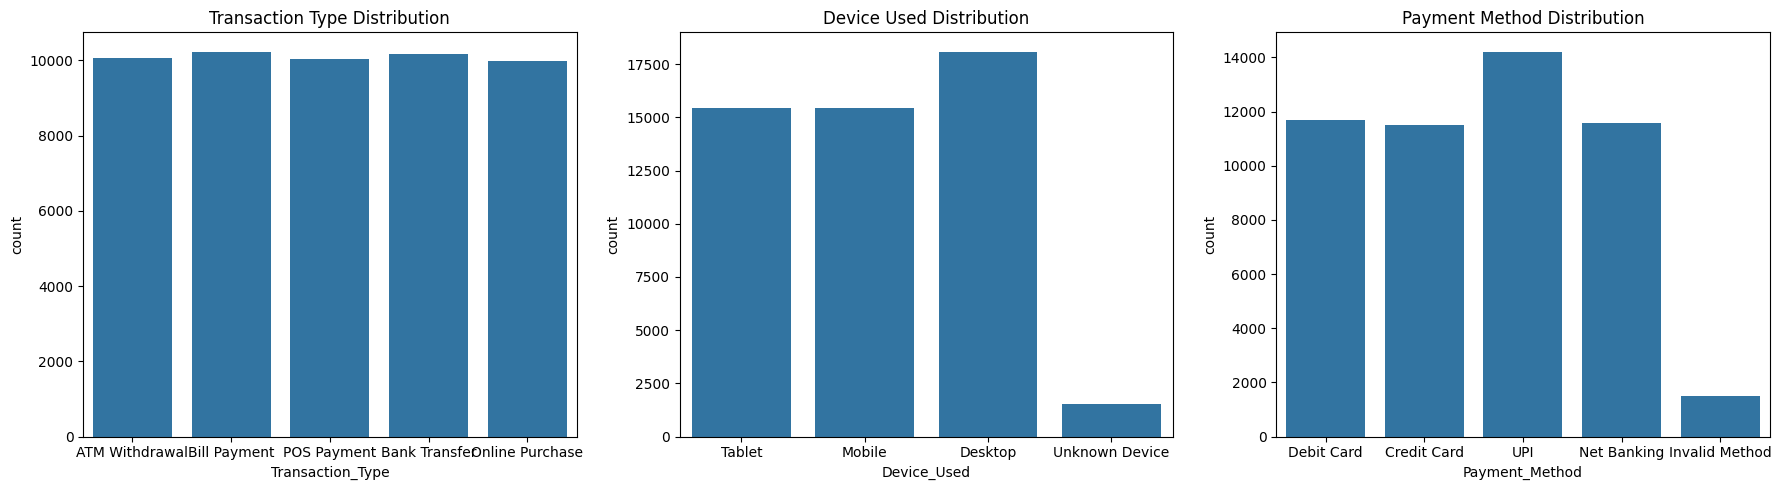

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))  # Adjust size as needed

# 1st subplot
plt.subplot(1, 3, 1)
sns.countplot(x="Transaction_Type", data=new_data)
plt.title("Transaction Type Distribution")

# 2nd subplot
plt.subplot(1, 3, 2)
sns.countplot(x="Device_Used", data=new_data)
plt.title("Device Used Distribution")

# 3rd subplot
plt.subplot(1, 3, 3)
sns.countplot(x="Payment_Method", data=new_data)
plt.title("Payment Method Distribution")

plt.tight_layout()
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_63168\3171517634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Time_of_Transaction"].value_counts().sort_values().index,


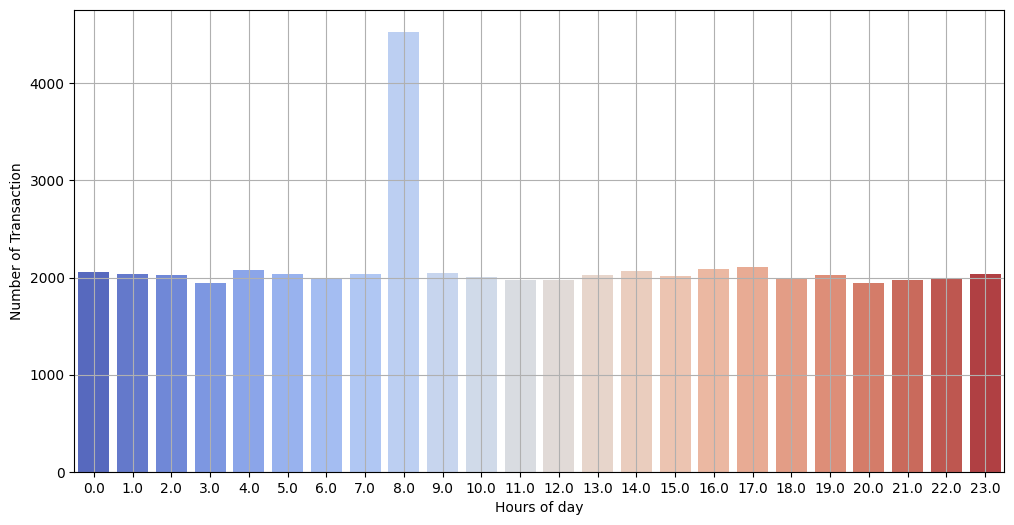

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(x=data["Time_of_Transaction"].value_counts().sort_values().index, 
            y=data["Time_of_Transaction"].value_counts().sort_index().values, palette="coolwarm")
plt.xlabel("Hours of day")
plt.ylabel("Number of Transaction")
plt.grid(True)
plt.show()

In [79]:
print(data["Location"].nunique())
print(data["Location"].unique())

8
['San Francisco' 'New York' 'Boston' 'Chicago' 'Houston' 'Miami'
 'Los Angeles' 'Seattle']


<Axes: xlabel='Location', ylabel='count'>

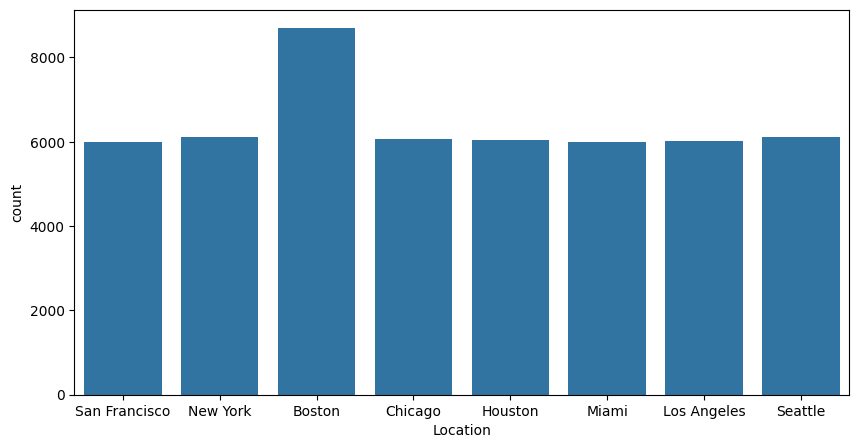

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(x=data["Location"])

In [81]:
from sklearn.preprocessing import LabelEncoder

cat_col = ["Device_Used", "Location", "Transaction_Type", "Payment_Method"]
label_encoders = {}

for col in cat_col:
    le = LabelEncoder()
    all_possible_values = data[col].unique().tolist()

    # ✅ Manually append expected unseen values
    if col == "Transaction_Type":
        all_possible_values += ['POS Payment', 'ATM Withdrawal', 'Bill Payment']

    le.fit(list(set(all_possible_values)))
    data[col] = le.transform(data[col])
    label_encoders[col] = le



In [82]:
label_encoders["Transaction_Type"].classes_
# If 'POS Payment' is missing, it will throw an error during transform


array(['ATM Withdrawal', 'Bank Transfer', 'Bill Payment',
       'Online Purchase', 'POS Payment'], dtype='<U15')

In [83]:
data.head(
)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,0,16.0,2,6,0,119,13,1,0
1,T2,4507,1554.58,0,13.0,1,5,4,79,3,0,0
2,T3,1860,2395.02,0,12.0,1,0,3,115,9,4,0
3,T4,2294,100.10,2,15.0,0,1,4,3,4,4,0
4,T5,2130,1490.50,4,19.0,1,6,2,57,7,0,0


In [84]:
data.drop(columns="Transaction_ID",inplace=True)

In [85]:
x=data.drop(columns=["Fraudulent"])
y=data["Fraudulent"]

In [86]:
x.shape,y.shape
print(len(x), len(y))  # Check lengths
min_len = min(len(x), len(y))
x = x[:min_len]
y = y[:min_len]



51000 51000


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [89]:
data["Fraudulent"].isnull().sum()

np.int64(0)

In [90]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
rf = RandomForestClassifier( n_estimators=100,class_weight="balanced", random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)*100

87.18627450980392

In [91]:
y_pred=rf.predict(x_test)

print("Accuracy of Model is: ",accuracy_score(y_pred,y_test))
print("Classification report:-\n" ,classification_report(y_pred,y_test))

Accuracy of Model is:  0.8718627450980392
Classification report:-
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      9267
           1       0.13      0.07      0.09       933

    accuracy                           0.87     10200
   macro avg       0.52      0.51      0.51     10200
weighted avg       0.84      0.87      0.85     10200



[0.13739406 0.13585504 0.06529855 0.15851337 0.0668409  0.0770696
 0.07304537 0.10872905 0.08833586 0.0889182 ]


C:\Users\Acer\AppData\Local\Temp\ipykernel_63168\2805265183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


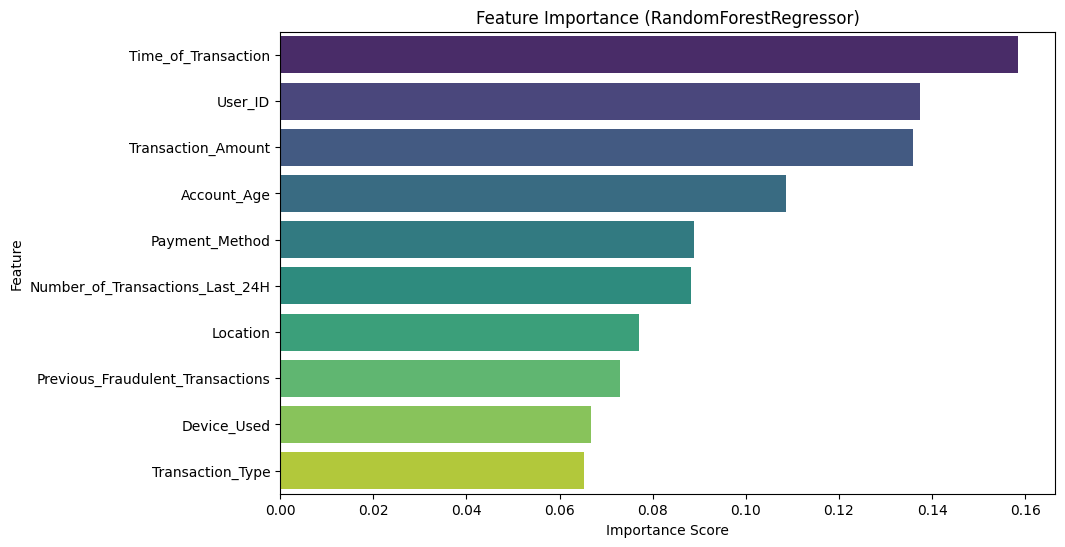

In [92]:
importances = rf.feature_importances_
feature_names = x.columns
print(importances)

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance (RandomForestRegressor)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [93]:
%pip install joblib
import joblib
import os

joblib.dump(rf, "Razorpay_frauds.pkl", compress=9)
joblib.dump(label_encoders, "label_encoders.pkl")


print(os.path.getsize("Razorpay_frauds.pkl"))

Note: you may need to restart the kernel to use updated packages.


23988981


In [95]:
print(f"Model file size: {os.path.getsize('Razorpay_frauds.pkl') / 1024:.2f} KB")
print(f"Model file size: {os.path.getsize('label_encoders.pkl') / 1024:.2f} KB")

Model file size: 23426.74 KB
Model file size: 1.85 KB
